In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
import src.data as dt
import src.feature_engineering as fe

import warnings
warnings.filterwarnings('ignore')

First 5 rows:
                        open     high      low    close  spread
time                                                           
2020-01-02 01:00:00  2165.82  2169.32  2162.89  2163.11      20
2020-01-02 02:00:00  2163.13  2166.00  2162.70  2164.96      20
2020-01-02 03:00:00  2164.94  2167.28  2162.74  2165.66      20
2020-01-02 04:00:00  2165.66  2167.58  2163.86  2167.39      22
2020-01-02 05:00:00  2167.39  2169.93  2166.75  2169.91      20 

------------------------------------------------------------------------------------------------------------------------
Last 5 rows:
                        open     high      low    close  spread
time                                                           
2025-09-05 16:00:00  5447.51  5456.26  5433.22  5455.01     102
2025-09-05 17:00:00  5454.84  5474.80  5451.73  5474.64     107
2025-09-05 18:00:00  5474.54  5477.82  5459.37  5468.49      92
2025-09-05 19:00:00  5468.33  5483.78  5466.57  5476.84      98
2025-09-05 20:00:0

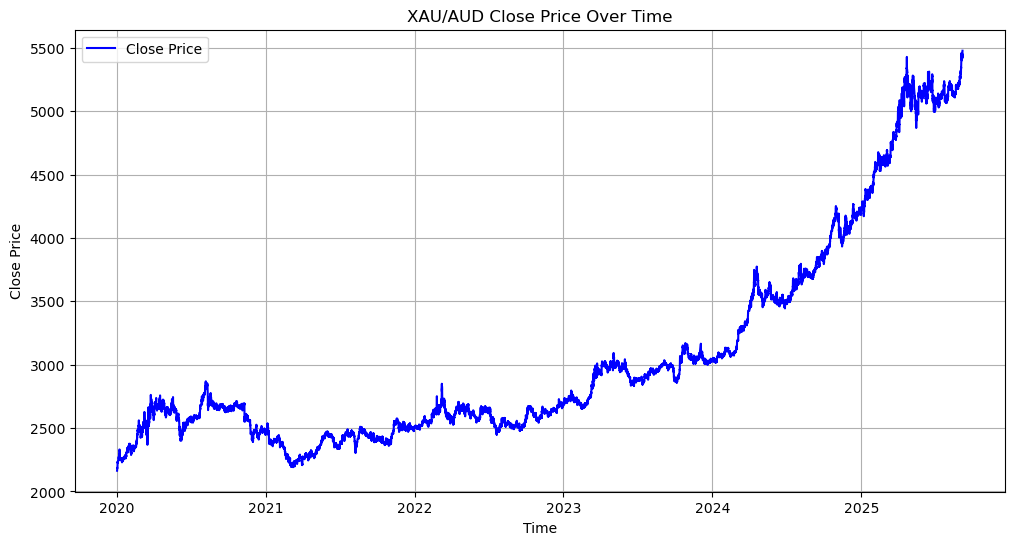

In [2]:
df = dt.get_data(file_path='../data/xauaud.csv', symbole='XAU/AUD')

First 5 rows:
                         open      high       low     close    spread
time                                                                 
2020-01-02 01:00:00       NaN       NaN       NaN       NaN       NaN
2020-01-02 02:00:00 -0.001242 -0.001530 -0.000088  0.000855  0.000000
2020-01-02 03:00:00  0.000837  0.000591  0.000018  0.000323  0.000000
2020-01-02 04:00:00  0.000333  0.000138  0.000518  0.000799  0.100000
2020-01-02 05:00:00  0.000799  0.001084  0.001336  0.001163 -0.090909 

------------------------------------------------------------------------------------------------------------------------
Last 5 rows:
                         open      high       low     close    spread
time                                                                 
2025-09-05 16:00:00  0.002874 -0.001968  0.001910  0.001397  0.243902
2025-09-05 17:00:00  0.001346  0.003398  0.003407  0.003599  0.049020
2025-09-05 18:00:00  0.003611  0.000552  0.001401 -0.001123 -0.140187
2025-09-05

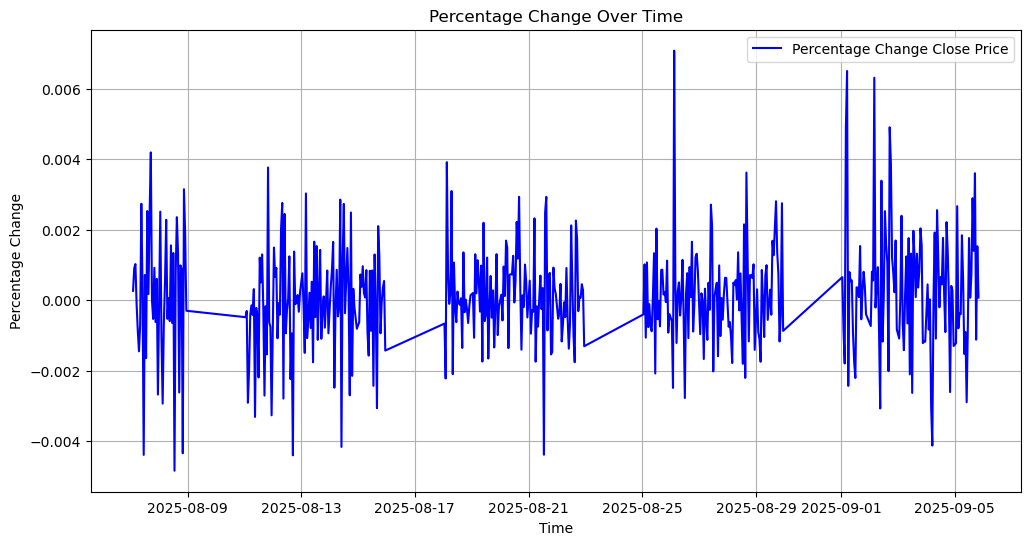

In [3]:
ohlc_pct_change_df = dt.pct_change(df)
ohlc_pct_change_df.to_csv('../data/ohlc_pct_change.csv')

First 5 rows:
                         open      high       low     close    spread  \
time                                                                    
2020-01-02 01:00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-02 02:00:00 -0.001242 -0.001530 -0.000088  0.000855  0.000000   
2020-01-02 03:00:00  0.000837  0.000591  0.000018  0.000323  0.000000   
2020-01-02 04:00:00  0.000333  0.000138  0.000518  0.000799  0.100000   
2020-01-02 05:00:00  0.000799  0.001084  0.001336  0.001163 -0.090909   

                     close_lag_1  close_lag_2  close_lag_3  close_lag_4  \
time                                                                      
2020-01-02 01:00:00          NaN          NaN          NaN          NaN   
2020-01-02 02:00:00          NaN          NaN          NaN          NaN   
2020-01-02 03:00:00     0.000855          NaN          NaN          NaN   
2020-01-02 04:00:00     0.000323     0.000855          NaN          NaN   
2020-01-02 05:00:00     

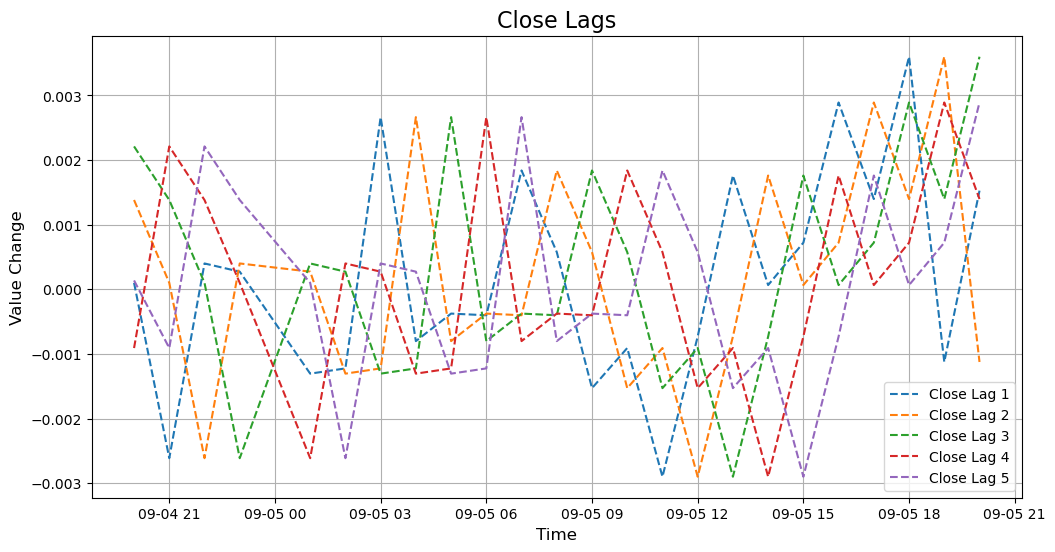

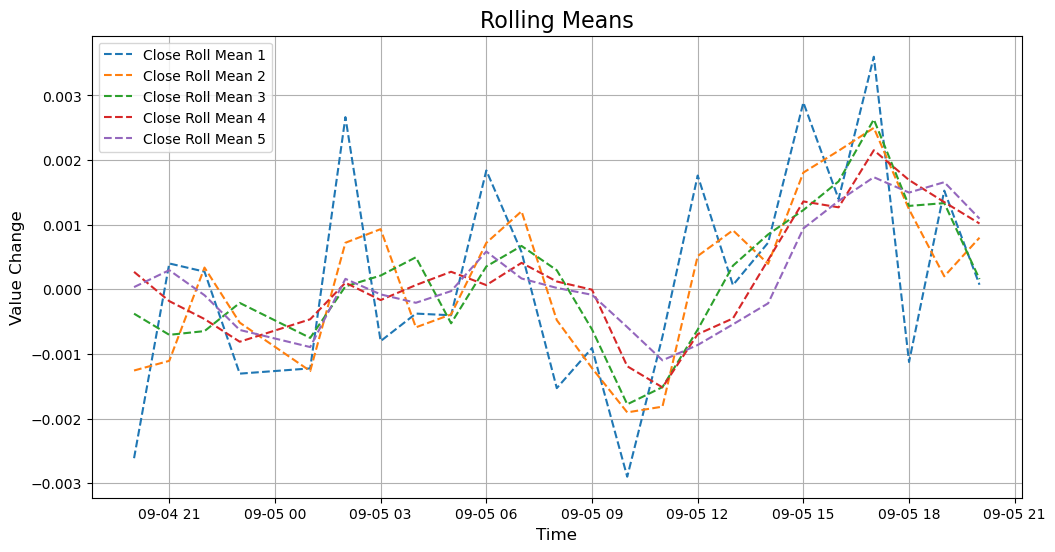

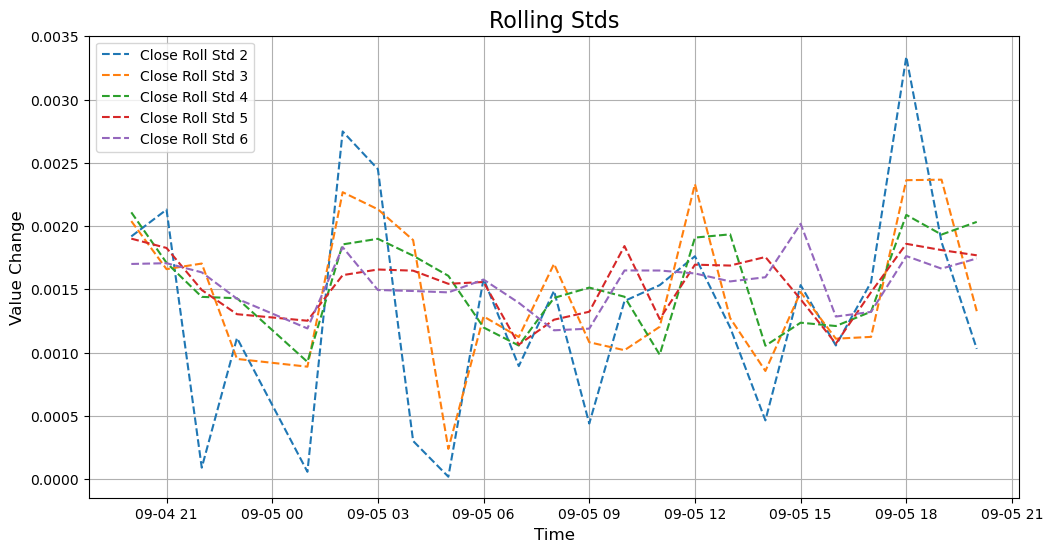

In [4]:
df_with_features = fe.lags_and_rolls(df, num_lags=5, num_rolls=5)

First 5 rows:
                         open      high        low     close    spread  \
time                                                                     
2020-01-02 01:00:00       NaN       NaN        NaN       NaN       NaN   
2020-01-02 02:00:00       NaN       NaN        NaN       NaN       NaN   
2020-01-02 03:00:00 -1.673699 -1.386133  -1.210545 -0.621945       NaN   
2020-01-02 04:00:00 -0.602543 -0.765763  26.999482  1.470630       inf   
2020-01-02 05:00:00  1.401979  6.832249   1.579022  0.455485 -1.909091   

                     close_lag_1  close_lag_2  close_lag_3  close_lag_4  \
time                                                                      
2020-01-02 01:00:00          NaN          NaN          NaN          NaN   
2020-01-02 02:00:00          NaN          NaN          NaN          NaN   
2020-01-02 03:00:00          NaN          NaN          NaN          NaN   
2020-01-02 04:00:00    -0.621945          NaN          NaN          NaN   
2020-01-02 05:00:

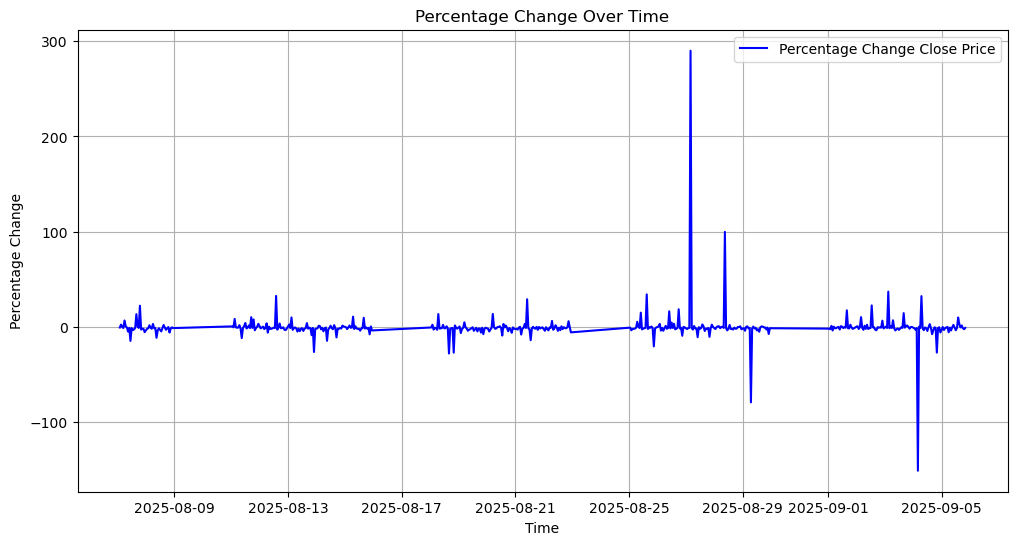

In [5]:
df_with_features_pct_change = dt.pct_change(df_with_features)